In [1]:
from speed import *
from datetime import datetime

client = pymongo.MongoClient('localhost')
collection = client.fcd.assets

print('done')

done


In [40]:

d1 = datetime(2020, 3, 4, 10, 0, 0)
d1 = datetime.timestamp(d1)
d2 = datetime(2020, 3, 4, 11, 0, 0)
d2 = datetime.timestamp(d2)

res = points_top_k_zones(collection, 70, 7, d1, d2)
print('done')

sorting done
done


In [42]:
res

[{'density': 6,
  'zone': {'center': [-118.303, 33.8901], 'radius': 7},
  'points': [{'_id': '352580082228086',
    'moving': 1,
    'recorded_at': 1583312417.0,
    'GPS_SPEED': 38.3864,
    'GPS_DIR': 69.13,
    'longitude': -118.303,
    'latitude': 33.8905},
   {'_id': '352580082228086',
    'moving': 1,
    'recorded_at': 1583312507.0,
    'GPS_SPEED': 1.06305,
    'GPS_DIR': 88.78,
    'longitude': -118.292,
    'latitude': 33.8924},
   {'_id': '352580082228086',
    'moving': 1,
    'recorded_at': 1583312566.0,
    'GPS_SPEED': 68.074,
    'GPS_DIR': 179.23,
    'longitude': -118.286,
    'latitude': 33.8913},
   {'_id': '352580082228086',
    'moving': 1,
    'recorded_at': 1583312556.0,
    'GPS_SPEED': 15.9494,
    'GPS_DIR': 131.84,
    'longitude': -118.286,
    'latitude': 33.8925},
   {'_id': '352580082228086',
    'moving': 1,
    'recorded_at': 1583312589.0,
    'GPS_SPEED': 118.95,
    'GPS_DIR': 177.63,
    'longitude': -118.286,
    'latitude': 33.8856},
   {'_id': '

# Code couleur vitesse

          vitesse <= 10  : rouge
    10  < vitesse <= 30  : orange
    30  < vitesse <= 50  : jaune
    50  < vitesse <= 70  : vert clair 
    70  < vitesse <= 90  : vert
    90  < vitesse <= 100 : turquoise
    100 < vitesse <= 110 : bleu clair
    110 < vitesse <= 130 : bleu-ciel
    130 < vitesse        : bleu foncé


In [4]:
map = afficher_zones_vitesse(res)
map

# Code couleur autour de la vitesse moyenne

                        vitesse <= moyenne - 30 km/h : rouge
    moyenne - 30 km/h < vitesse <= moyenne - 20 km/h : orange
    moyenne - 20 km/h < vitesse <= moyenne - 10 km/h : jaune
    moyenne - 10 km/h < vitesse <= moyenne - 5 km/h  : vert clair 
    moyenne - 5 km/h  < vitesse <= moyenne + 5 km/h  : vert
    moyenne + 5 km/h  < vitesse <= moyenne + 10 km/h : turquoise
    moyenne + 10 km/h < vitesse <= moyenne + 20 km/h : bleu clair
    moyenne + 20 km/h < vitesse <= moyenne + 30 km/h : bleu-ciel
    moyenne + 30 km/h < vitesse                      : bleu foncé


In [41]:
map2 = afficher_zones_avg_vitesse(res)
map2

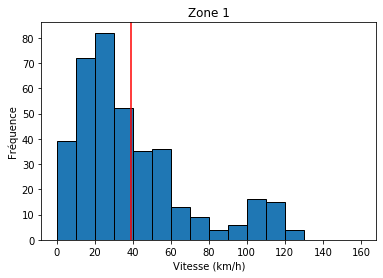

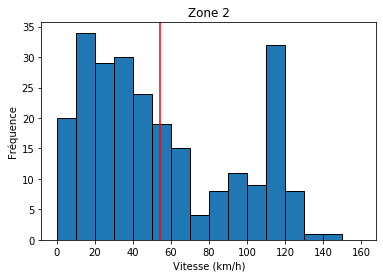

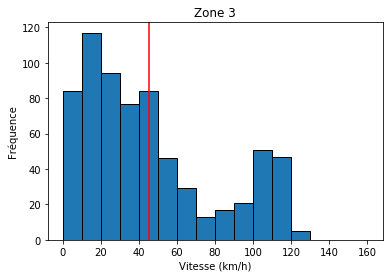

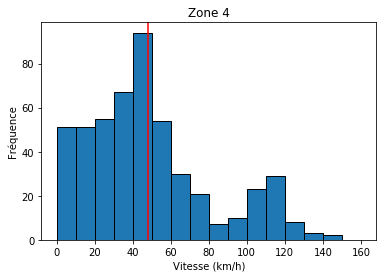

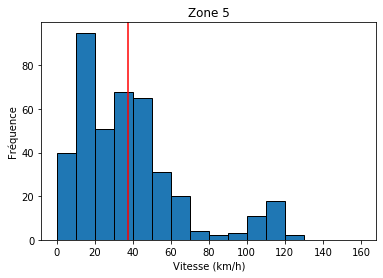

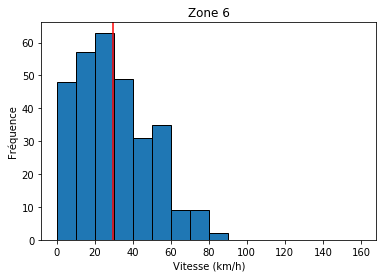

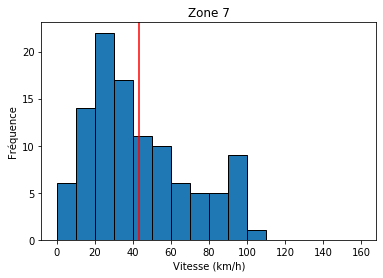

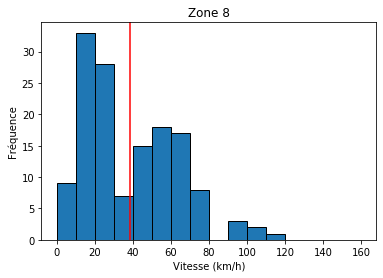

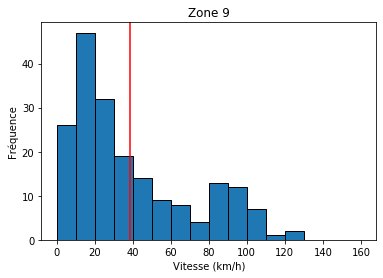

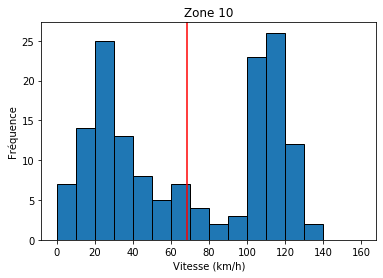

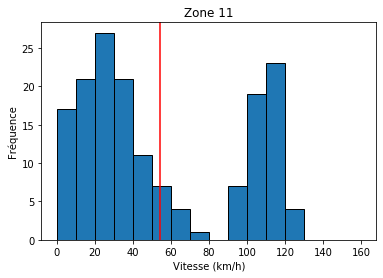

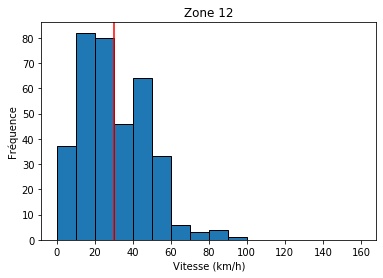

In [39]:

for i in range(0, 12):

    zone = res[i]
    speeds = []

    for point in zone['points']:
        speeds.append(point['GPS_SPEED'])

    tranches = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
    #plt.hist(speeds, bins=tranches, edgecolor='black')

    mu = zone['avg_speed']
    sigma = stats.pstdev(speeds)

    n, bins, patches = plt.hist(speeds, bins=tranches, edgecolor='black')

    #y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    #plt.plot(bins, y, '--', color ='green') 

    plt.axvline(mu, color='red', label='Vitesse moyenne')
    plt.xlabel('Vitesse (km/h)')
    plt.ylabel('Fréquence')
    plt.title('Zone '+ str(i+1))

    plt.show()